In [1]:
#!easy_install textblob
import pandas as pd
import textstat
import numpy as np
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import classification_report
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.metrics import roc_auc_score
from sklearn.svm import SVC
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn import preprocessing
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.stem.porter import PorterStemmer
from textblob import TextBlob
from spellchecker import SpellChecker
import seaborn as sns
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import Ridge

In [2]:
from collections import OrderedDict
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
path="D:/Trinity_DS/Dissertations/201901/Datasets/Kaggle/1429_1_v2.csv"

In [4]:
data_df = pd.read_csv(path,low_memory=False)

In [5]:
temp_df= data_df[['reviews.numHelpful','reviews.rating']]
temp_df.describe()

,reviews.numHelpful,reviews.rating
count,34131.000000,34627.000000
mean,0.630248,4.584573
std,13.215775,0.735653
min,0.000000,1.000000
25%,0.000000,4.000000
50%,0.000000,5.000000
75%,0.000000,5.000000
max,814.000000,5.000000


In [6]:
data_df.dtypes

id                       object
name                     object
asins                    object
brand                    object
categories               object
keys                     object
manufacturer             object
reviews.date             object
reviews.dateAdded        object
reviews.didPurchase      object
reviews.doRecommend      object
reviews.id              float64
reviews.numHelpful      float64
reviews.rating          float64
reviews.sourceURLs       object
reviews.text             object
reviews.title            object
reviews.userCity        float64
reviews.userProvince    float64
reviews.username         object
reviews.dateSeen         object
A1                       object
A2                       object
A3                       object
A4                       object
A5                       object
A6                       object
A7                       object
A8                       object
A9                       object
                         ...   
A17     

In [7]:
data_df['reviews_dateAdded_Date_time'] =  pd.to_datetime(data_df['reviews.dateAdded'])
data_df['reviews_dateSeen_Date_time'] =  pd.to_datetime(data_df['reviews.dateSeen'])
data_df['reviews_date_Date_time'] =  pd.to_datetime(data_df['reviews.date'])

In [8]:
pd.value_counts(temp_df['reviews.numHelpful'].values, sort=False)

0.0      30820
1.0       2049
2.0        562
4.0        122
8.0         35
16.0         6
12.0         9
32.0         2
64.0         1
384.0        1
57.0         1
25.0         3
93.0         1
355.0        1
43.0         1
302.0        1
105.0        1
36.0         3
84.0         1
650.0        1
780.0        1
27.0         2
195.0        1
263.0        1
174.0        1
53.0         2
10.0         6
9.0         21
14.0         5
40.0         1
         ...  
60.0         2
139.0        1
19.0         3
63.0         1
69.0         2
814.0        1
126.0        1
238.0        1
55.0         1
7.0         31
22.0         1
20.0         2
112.0        1
434.0        1
49.0         2
221.0        1
21.0         6
46.0         1
629.0        1
103.0        1
15.0         5
54.0         1
26.0         1
205.0        1
23.0         1
204.0        1
170.0        1
217.0        1
163.0        1
39.0         1
Length: 97, dtype: int64

In [9]:
data_df[['reviews_dateAdded_Date_time']]

,reviews_dateAdded_Date_time
0,2017-07-03 23:33:15+00:00
1,2017-07-03 23:33:15+00:00
2,2017-07-03 23:33:15+00:00
3,2017-07-03 23:33:15+00:00
4,2017-07-03 23:33:15+00:00
5,2017-07-03 23:33:15+00:00
6,2017-07-03 23:33:15+00:00
7,2017-07-03 23:33:15+00:00
8,2017-07-03 23:28:24+00:00
9,2017-07-03 23:28:24+00:00


In [10]:
filtered_df = data_df[data_df['reviews_dateAdded_Date_time'].notnull()]
filtered_df = data_df[data_df['reviews_date_Date_time'].notnull()]

In [11]:
filtered_df['diff_days'] = filtered_df['reviews_dateSeen_Date_time'] - filtered_df['reviews_date_Date_time']
filtered_df['diff_days']=filtered_df['diff_days']/np.timedelta64(1,'D')


D:\Installed_Applications\Anaconda\envs\Yelp\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
D:\Installed_Applications\Anaconda\envs\Yelp\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [12]:
filtered_df['diff_days'].describe()

count    34621.000000
mean       255.817513
std        189.049991
min          0.000000
25%        103.000000
50%        223.000000
75%        401.000000
max       2396.000000
Name: diff_days, dtype: float64

In [13]:
filtered_df[['reviews_dateAdded_Date_time','reviews.dateSeen','reviews.rating','reviews.numHelpful','reviews.text']]

,reviews_dateAdded_Date_time,reviews.dateSeen,reviews.rating,reviews.numHelpful,reviews.text
0,2017-07-03 23:33:15+00:00,2017-06-07T09:04:00.000Z,5.0,0.0,This product so far has not disappointed. My c...
1,2017-07-03 23:33:15+00:00,2017-06-07T09:04:00.000Z,5.0,0.0,great for beginner or experienced person. Boug...
2,2017-07-03 23:33:15+00:00,2017-06-07T09:04:00.000Z,5.0,0.0,Inexpensive tablet for him to use and learn on...
3,2017-07-03 23:33:15+00:00,2017-06-07T09:04:00.000Z,4.0,0.0,I've had my Fire HD 8 two weeks now and I love...
4,2017-07-03 23:33:15+00:00,2017-06-07T09:04:00.000Z,5.0,0.0,I bought this for my grand daughter when she c...
5,2017-07-03 23:33:15+00:00,2017-06-07T09:04:00.000Z,5.0,0.0,This amazon fire 8 inch tablet is the perfect ...
6,2017-07-03 23:33:15+00:00,2017-06-07T09:04:00.000Z,4.0,0.0,"Great for e-reading on the go, nice and light ..."
7,2017-07-03 23:33:15+00:00,2017-06-07T09:04:00.000Z,5.0,0.0,"I gave this as a Christmas gift to my inlaws, ..."
8,2017-07-03 23:28:24+00:00,2017-06-07T09:04:00.000Z,5.0,0.0,Great as a device to read books. I like that i...
9,2017-07-03 23:28:24+00:00,2017-06-07T09:04:00.000Z,5.0,0.0,I love ordering books and reading them with th...


In [14]:
filtered_df['usefull_diff'] = filtered_df['reviews.numHelpful']/filtered_df['diff_days']

D:\Installed_Applications\Anaconda\envs\Yelp\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [15]:
filtered_df

,id,name,asins,brand,categories,keys,manufacturer,reviews.date,reviews.dateAdded,reviews.didPurchase,...,A42,A43,A44,A45,A46,reviews_dateAdded_Date_time,reviews_dateSeen_Date_time,reviews_date_Date_time,diff_days,usefull_diff
0,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,NaN,...,NaN,NaN,NaN,NaN,NaN,2017-07-03 23:33:15+00:00,2017-06-07 09:04:00+00:00,2017-01-13 00:00:00+00:00,145.377778,0.000000
1,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,NaN,...,NaN,NaN,NaN,NaN,NaN,2017-07-03 23:33:15+00:00,2017-06-07 09:04:00+00:00,2017-01-13 00:00:00+00:00,145.377778,0.000000
2,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,NaN,...,NaN,NaN,NaN,NaN,NaN,2017-07-03 23:33:15+00:00,2017-06-07 09:04:00+00:00,2017-01-13 00:00:00+00:00,145.377778,0.000000
3,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,NaN,...,NaN,NaN,NaN,NaN,NaN,2017-07-03 23:33:15+00:00,2017-06-07 09:04:00+00:00,2017-01-13 00:00:00+00:00,145.377778,0.000000
4,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-12T00:00:00.000Z,2017-07-03T23:33:15Z,NaN,...,NaN,NaN,NaN,NaN,NaN,2017-07-03 23:33:15+00:00,2017-06-07 09:04:00+00:00,2017-01-12 00:00:00+00:00,146.377778,0.000000
5,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-12T00:00:00.000Z,2017-07-03T23:33:15Z,NaN,...,NaN,NaN,NaN,NaN,NaN,2017-07-03 23:33:15+00:00,2017-06-07 09:04:00+00:00,2017-01-12 00:00:00+00:00,146.377778,0.000000
6,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-12T00:00:00.000Z,2017-07-03T23:33:15Z,NaN,...,NaN,NaN,NaN,NaN,NaN,2017-07-03 23:33:15+00:00,2017-06-07 09:04:00+00:00,2017-01-12 00:00:00+00:00,146.377778,0.000000
7,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-12T00:00:00.000Z,2017-07-03T23:33:15Z,NaN,...,NaN,NaN,NaN,NaN,NaN,2017-07-03 23:33:15+00:00,2017-06-07 09:04:00+00:00,2017-01-12 00:00:00+00:00,146.377778,0.000000
8,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-23T00:00:00.000Z,2017-07-03T23:28:24Z,NaN,...,NaN,NaN,NaN,NaN,NaN,2017-07-03 23:28:24+00:00,2017-06-07 09:04:00+00:00,2017-01-23 00:00:00+00:00,135.377778,0.000000
9,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-23T00:00:00.000Z,2017-07-03T23:28:24Z,NaN,...,NaN,NaN,NaN,NaN,NaN,2017-07-03 23:28:24+00:00,2017-06-07 09:04:00+00:00,2017-01-23 00:00:00+00:00,135.377778,0.000000


In [16]:
filtered_df['usefull_bin'] = np.where(filtered_df['reviews.numHelpful']==0, '0', '1')

D:\Installed_Applications\Anaconda\envs\Yelp\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [17]:
filtered_df['usefull_bin']

0        0
1        0
2        0
3        0
4        0
5        0
6        0
7        0
8        0
9        0
10       0
11       0
12       0
13       0
14       0
15       0
16       0
17       0
18       0
19       0
20       0
21       0
22       0
23       0
24       0
25       0
26       0
27       0
28       0
29       0
        ..
34626    1
34628    1
34630    1
34631    1
34632    1
34633    1
34634    1
34635    1
34636    1
34637    1
34638    1
34639    1
34640    1
34642    1
34643    1
34644    1
34646    1
34647    1
34648    1
34649    1
34650    1
34651    1
34652    1
34653    1
34654    1
34655    1
34656    1
34657    1
34658    1
34659    1
Name: usefull_bin, Length: 34621, dtype: object

In [18]:
filtered_df['day_of_week'] = filtered_df['reviews_dateAdded_Date_time'].dt.weekday_name

D:\Installed_Applications\Anaconda\envs\Yelp\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [19]:
filtered_df['reviews_dateAdded_hour'] = filtered_df['reviews_dateAdded_Date_time'].dt.hour

D:\Installed_Applications\Anaconda\envs\Yelp\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [20]:
#textstat.flesch_reading_ease(.id)
readablity = []
for text in filtered_df['reviews.text']:
    readablity.append(textstat.flesch_reading_ease(str(text)))
filtered_df['flesch_reading_ease']=readablity

D:\Installed_Applications\Anaconda\envs\Yelp\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [21]:
smog = []
for text in filtered_df['reviews.text']:
    smog.append(textstat.smog_index(str(text)))


In [22]:
coleman_liau=[]
for text in filtered_df['reviews.text']:
    coleman_liau.append(textstat.coleman_liau_index(str(text)))


In [23]:
sentence_count=[]
for text in filtered_df['reviews.text']:
    sentence_count.append(textstat.sentence_count(str(text)))

In [24]:
gunning_fog=[]
for text in filtered_df['reviews.text']:
    gunning_fog.append(textstat.gunning_fog(str(text)))

In [25]:
flesch_kincaid_grade=[]
for text in filtered_df['reviews.text']:
    flesch_kincaid_grade.append(textstat.flesch_kincaid_grade(str(text)))

In [26]:
spell = SpellChecker()
spelling_errors=[]

for text in filtered_df['reviews.text']:
    spelling_errors.append(len(spell.unknown(str(text).split(' '))))

In [27]:
subjectivity_list=[]
polarity_list=[]
for text in filtered_df['reviews.text']:
    subjectivity_list.append(TextBlob(str(text)).sentiment.subjectivity)
    polarity_list.append(TextBlob(str(text)).sentiment.polarity)

In [28]:
filtered_df['smog']=smog
filtered_df['coleman_liau']=coleman_liau
filtered_df['sentence_count']=sentence_count
filtered_df['gunning_fog']=gunning_fog
filtered_df['flesch_kincaid_grade']=flesch_kincaid_grade
filtered_df['spelling_errors']=spelling_errors
filtered_df['subjectivity']=subjectivity_list
filtered_df['polarity']=polarity_list

D:\Installed_Applications\Anaconda\envs\Yelp\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
D:\Installed_Applications\Anaconda\envs\Yelp\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
D:\Installed_Applications\Anaconda\envs\Yelp\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value i

In [29]:
filtered_df

,id,name,asins,brand,categories,keys,manufacturer,reviews.date,reviews.dateAdded,reviews.didPurchase,...,reviews_dateAdded_hour,flesch_reading_ease,smog,coleman_liau,sentence_count,gunning_fog,flesch_kincaid_grade,spelling_errors,subjectivity,polarity
0,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,NaN,...,23.0,74.69,0.0,6.84,2,9.84,6.2,2,0.783333,0.325000
1,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,NaN,...,23.0,81.29,0.0,5.34,2,8.51,3.7,1,0.825000,0.800000
2,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,NaN,...,23.0,92.12,0.0,4.16,2,6.74,3.6,5,0.700000,0.600000
3,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,NaN,...,23.0,75.58,9.5,6.51,4,12.75,10.0,10,0.731250,0.374583
4,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-12T00:00:00.000Z,2017-07-03T23:33:15Z,NaN,...,23.0,77.06,8.8,7.02,6,9.51,7.4,8,0.616226,0.368056
5,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-12T00:00:00.000Z,2017-07-03T23:33:15Z,NaN,...,23.0,90.09,3.1,3.01,3,6.00,4.4,3,0.550000,0.375000
6,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-12T00:00:00.000Z,2017-07-03T23:33:15Z,NaN,...,23.0,76.56,0.0,9.11,1,10.00,7.6,5,0.637500,0.525000
7,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-12T00:00:00.000Z,2017-07-03T23:33:15Z,NaN,...,23.0,83.66,0.0,5.03,2,6.74,4.8,3,0.844444,0.544444
8,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-23T00:00:00.000Z,2017-07-03T23:28:24Z,NaN,...,23.0,84.17,8.8,6.31,4,6.60,4.6,6,0.763333,0.406667
9,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-23T00:00:00.000Z,2017-07-03T23:28:24Z,NaN,...,23.0,78.25,0.0,7.34,1,8.00,4.8,1,0.600000,0.500000


In [30]:
final_df = filtered_df[['polarity','subjectivity','day_of_week','reviews_dateAdded_hour','spelling_errors','reviews.rating','smog','coleman_liau','sentence_count','reviews.numHelpful','gunning_fog','flesch_kincaid_grade','usefull_bin','usefull_diff']]

In [31]:
final_df=final_df.dropna()
final_df

,polarity,subjectivity,day_of_week,reviews_dateAdded_hour,spelling_errors,reviews.rating,smog,coleman_liau,sentence_count,reviews.numHelpful,gunning_fog,flesch_kincaid_grade,usefull_bin,usefull_diff
0,0.325000,0.783333,Monday,23.0,2,5.0,0.0,6.84,2,0.0,9.84,6.2,0,0.000000
1,0.800000,0.825000,Monday,23.0,1,5.0,0.0,5.34,2,0.0,8.51,3.7,0,0.000000
2,0.600000,0.700000,Monday,23.0,5,5.0,0.0,4.16,2,0.0,6.74,3.6,0,0.000000
3,0.374583,0.731250,Monday,23.0,10,4.0,9.5,6.51,4,0.0,12.75,10.0,0,0.000000
4,0.368056,0.616226,Monday,23.0,8,5.0,8.8,7.02,6,0.0,9.51,7.4,0,0.000000
5,0.375000,0.550000,Monday,23.0,3,5.0,3.1,3.01,3,0.0,6.00,4.4,0,0.000000
6,0.525000,0.637500,Monday,23.0,5,4.0,0.0,9.11,1,0.0,10.00,7.6,0,0.000000
7,0.544444,0.844444,Monday,23.0,3,5.0,0.0,5.03,2,0.0,6.74,4.8,0,0.000000
8,0.406667,0.763333,Monday,23.0,6,5.0,8.8,6.31,4,0.0,6.60,4.6,0,0.000000
9,0.500000,0.600000,Monday,23.0,1,5.0,0.0,7.34,1,0.0,8.00,4.8,0,0.000000


In [33]:
sent_df = final_df[['polarity','subjectivity','smog','coleman_liau','sentence_count','gunning_fog','flesch_kincaid_grade','usefull_bin','spelling_errors']]

In [34]:
sent_df=sent_df.dropna()
sent_df

,polarity,subjectivity,smog,coleman_liau,sentence_count,gunning_fog,flesch_kincaid_grade,usefull_bin,spelling_errors
0,0.325000,0.783333,0.0,6.84,2,9.84,6.2,0,2
1,0.800000,0.825000,0.0,5.34,2,8.51,3.7,0,1
2,0.600000,0.700000,0.0,4.16,2,6.74,3.6,0,5
3,0.374583,0.731250,9.5,6.51,4,12.75,10.0,0,10
4,0.368056,0.616226,8.8,7.02,6,9.51,7.4,0,8
5,0.375000,0.550000,3.1,3.01,3,6.00,4.4,0,3
6,0.525000,0.637500,0.0,9.11,1,10.00,7.6,0,5
7,0.544444,0.844444,0.0,5.03,2,6.74,4.8,0,3
8,0.406667,0.763333,8.8,6.31,4,6.60,4.6,0,6
9,0.500000,0.600000,0.0,7.34,1,8.00,4.8,0,1


In [35]:
X= np.array(sent_df.drop('usefull_bin', axis=1))
Y= np.array(sent_df['usefull_bin'])

In [37]:
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.33, random_state=99)
X_train_scaled = preprocessing.scale(X_train)
X_test_scaled = preprocessing.scale(X_test)
#scaler.transform(X_train)


# DecisionTree

In [38]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train_scaled, y_train)
Y_train_Pred=clf.predict(X_train_scaled)
accuracy_score(y_train, Y_train_Pred)
Y_test_Pred=clf.predict(X_test_scaled)
target_names = ['0', '1']
print(classification_report(y_test, Y_test_Pred, target_names=target_names))

              precision    recall  f1-score   support

           0       0.90      0.87      0.88      7074
           1       0.14      0.17      0.16       858

    accuracy                           0.80      7932
   macro avg       0.52      0.52      0.52      7932
weighted avg       0.82      0.80      0.81      7932



# RANDOMFOREST

In [39]:
clf_RF = RandomForestClassifier(n_estimators=1000,random_state=0,max_depth=3,class_weight='balanced')
clf_RF.fit(X_train_scaled, y_train)
Y_train_Pred=clf_RF.predict(X_train_scaled)
Y_test_RF_Pred=clf_RF.predict(X_test_scaled)
print("Training Accuracy",accuracy_score(y_train, Y_train_Pred))
target_names=['0','1']
print(classification_report(y_test, Y_test_RF_Pred, target_names=target_names))

Training Accuracy 0.750108675402099
              precision    recall  f1-score   support

           0       0.91      0.79      0.84      7074
           1       0.17      0.36      0.23       858

    accuracy                           0.74      7932
   macro avg       0.54      0.57      0.54      7932
weighted avg       0.83      0.74      0.78      7932



# SVM

In [84]:
clf_SVM = SVC(gamma='auto',class_weight='balanced')
clf_SVM.fit(X_train_scaled, y_train) 


SVC(C=1.0, cache_size=200, class_weight='balanced', coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [85]:
Y_test_SVM_Pred=clf_SVM.predict(X_test_scaled)
target_names=['0','1']
print(classification_report(y_test, Y_test_SVM_Pred, target_names=target_names))

              precision    recall  f1-score   support

           0       0.91      0.80      0.85      7074
           1       0.18      0.36      0.24       858

    accuracy                           0.75      7932
   macro avg       0.54      0.58      0.54      7932
weighted avg       0.83      0.75      0.79      7932



In [46]:
sent_df.groupby('usefull_bin').count()

,polarity,subjectivity,smog,coleman_liau,sentence_count,gunning_fog,flesch_kincaid_grade,spelling_errors
usefull_bin,,,,,,,,
0,21378,21378,21378,21378,21378,21378,21378,21378
1,2657,2657,2657,2657,2657,2657,2657,2657


# Linear Regression

In [40]:
list(filtered_df)
#filtered_df['diff_months']=filtered_df['diff_days']/np.timedelta64(1,'M')
filtered_df['diff_months']= ( filtered_df['reviews_dateSeen_Date_time'].dt.date - filtered_df['reviews_date_Date_time'].dt.date )/np.timedelta64(1,'M')

filtered_df['diff_months']=filtered_df['diff_months'].astype(int)
filtered_df['diff_months']

D:\Installed_Applications\Anaconda\envs\Yelp\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
D:\Installed_Applications\Anaconda\envs\Yelp\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


0         4
1         4
2         4
3         4
4         4
5         4
6         4
7         4
8         4
9         4
10        4
11        4
12        4
13        4
14        4
15        4
16        4
17        4
18        4
19        4
20        4
21        4
22        4
23        4
24        4
25        4
26        4
27        4
28        4
29        4
         ..
34626    10
34628    20
34630    78
34631    50
34632    56
34633    76
34634    61
34635    61
34636    61
34637    59
34638    61
34639    38
34640    37
34642    37
34643    34
34644    38
34646    35
34647     2
34648     9
34649     7
34650    23
34651     7
34652    32
34653    33
34654    33
34655    35
34656    33
34657    34
34658    34
34659    34
Name: diff_months, Length: 34621, dtype: int32

In [41]:
filtered_df['log_usefull']=np.log(filtered_df['reviews.numHelpful']+1)

D:\Installed_Applications\Anaconda\envs\Yelp\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [45]:
final_df = filtered_df[['day_of_week','reviews_dateAdded_hour','spelling_errors',
                        'reviews.rating','smog','coleman_liau','sentence_count'
                        ,'gunning_fog','flesch_kincaid_grade','log_usefull','polarity','subjectivity','diff_months']]

,reviews_dateAdded_hour,spelling_errors,reviews.rating,smog,coleman_liau,sentence_count,gunning_fog,flesch_kincaid_grade,log_usefull,polarity,subjectivity,diff_months
reviews_dateAdded_hour,1,0.06,0.1,0.07,0.05,0.06,0.03,0.05,-0.01,-0.04,-0.02,0.05
spelling_errors,0.06,1,-0.1,0.57,0.09,0.82,0.2,0.16,0.26,-0.16,-0.03,0.09
reviews.rating,0.1,-0.1,1,-0.07,-0.03,-0.08,-0.08,-0.06,-0.13,0.24,0.09,-0.02
smog,0.07,0.57,-0.07,1,0.02,0.68,0.04,0.03,0.15,-0.17,-0.03,0.07
coleman_liau,0.05,0.09,-0.03,0.02,1,-0.05,0.44,0.67,0.03,-0.02,0.02,0.03
sentence_count,0.06,0.82,-0.08,0.68,-0.05,1,-0.06,-0.05,0.21,-0.15,-0.03,0.08
gunning_fog,0.03,0.2,-0.08,0.04,0.44,-0.06,1,0.71,0.09,-0.14,-0.02,0.04
flesch_kincaid_grade,0.05,0.16,-0.06,0.03,0.67,-0.05,0.71,1,0.07,-0.12,-0.04,0.05
log_usefull,-0.01,0.26,-0.13,0.15,0.03,0.21,0.09,0.07,1,-0.06,-0.02,0.34
polarity,-0.04,-0.16,0.24,-0.17,-0.02,-0.15,-0.14,-0.12,-0.06,1,0.55,-0.01


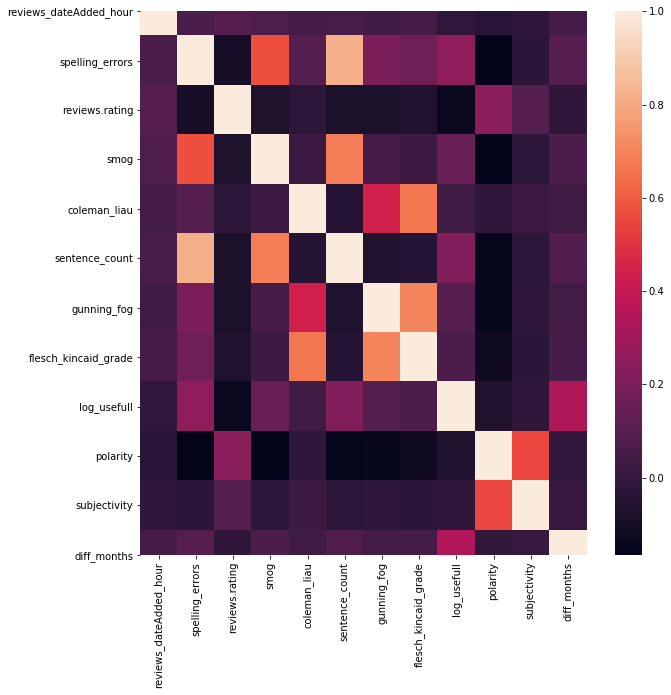

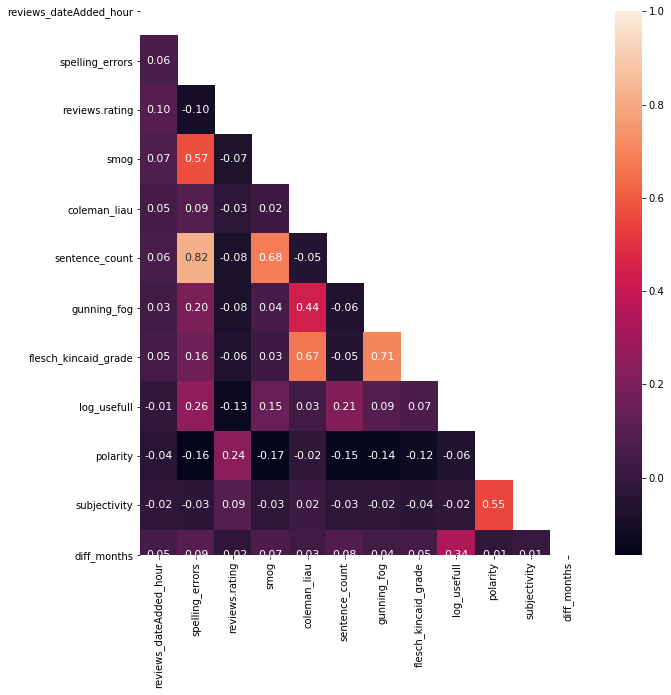

In [43]:

#(analysis_df['diff_days']/np.timedelta64(1,'M')).describe()
corr_df = final_df
corr = (corr_df.corr())

plt.figure(figsize= (10, 10))
sns.heatmap(corr_df.corr())
fig, ax = plt.subplots(figsize=(10, 10)) 
mask = np.zeros_like(corr_df.corr())

mask[np.triu_indices_from(mask)] = 1
sns.heatmap(corr_df.corr(), mask= mask, ax= ax, annot= True,annot_kws={"size": 11},fmt='.2f')


corr = np.round((corr_df.corr()),2)
corr.style.background_gradient(cmap='coolwarm') 

In [46]:
sent_df = final_df[['smog','coleman_liau','sentence_count','gunning_fog',
                    'flesch_kincaid_grade','spelling_errors','log_usefull',
                    'polarity','diff_months','subjectivity']]
sent_df=sent_df.dropna()
X= np.array(sent_df.drop('log_usefull', axis=1))
Y= np.array(sent_df['log_usefull'])
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.33, random_state=99)
X_train_scaled = preprocessing.scale(X_train)
X_test_scaled = preprocessing.scale(X_test)
#scaler.transform(X_train)
sent_df.log_usefull.describe()

count    34118.000000
mean         0.102092
std          0.381599
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          6.594413
Name: log_usefull, dtype: float64

In [47]:
reg = LinearRegression().fit(X_train_scaled, y_train)

In [48]:
y_pred=reg.predict(X_test_scaled)

In [49]:
#scaler.transform(X_test)
mean_squared_error(y_test, (np.exp(y_pred)-1))*100

21.485748751786154

In [50]:
y_pred

array([-0.07021622,  0.02658398, -0.07112892, ...,  0.04422417,
        0.10000759, -0.04500685])

In [51]:
r2_score(y_test,(np.exp(y_pred)-1))

-0.42562088057069514

In [52]:
#analysis_df.to_csv("D:/Trinity_DS/Dissertations/201907/dataset_v2/analysis_df.csv", index = None, header=True)
clf_ridge = Ridge(alpha=100000)
clf_ridge.fit(X_train_scaled, y_train) 
y_pred_0=clf_ridge.predict(X_train_scaled)
#scaler.transform(X_test)
mean_squared_error(y_train,np.exp(y_pred_0)-1)*100


12.992591857715578

In [53]:
y_pred=clf_ridge.predict(X_test_scaled)
#scaler.transform(X_test)
mean_squared_error(np.exp(y_pred)-1,y_test)*100


13.837860606509722

In [54]:
r2_score(y_test,(np.exp(y_pred)-1))

0.081831252381794

In [55]:
(np.exp(y_pred)-1).min()

0.03212411789535863

# RandomForest Regressor

In [56]:
from sklearn.ensemble import RandomForestRegressor
rf_regr = RandomForestRegressor( random_state=0,
                             n_estimators=1000)
rf_regr.fit(X_train_scaled, y_train)
y_rf_pred = rf_regr.predict(X_test_scaled)

In [57]:
mean_squared_error(y_test, (np.exp(y_rf_pred)-1))*100

415.4690817734475

In [58]:
(np.exp(y_rf_pred)-1).min()

0.0

In [59]:
r2_score(y_test,(np.exp(y_rf_pred)-1))

-26.56717510989796

# Chi Sq Test

In [ ]:
newdf=final_df.groupby(['day_of_week','reviews.rating']).count()
np_matix= np.array(final_df)
np_matix

days_rating=pd.crosstab(np_matix[:,2],np_matix[:,0],
            rownames=['Days'], colnames=['Ratings'],)
chi2 , p ,dof ,expected = stats.chi2_contingency(days_rating)
print("Reviews and DaysOfWeek chi_2 value---------------",chi2)
print("Reviews and DaysOfWeek p value-------------------",p)
print("Reviews and DaysOfWeek degreeoffreedom value-----",dof)

In [ ]:
dum_df1 = pd.DataFrame()
dum_df1['hr']=final_df['reviews_dateAdded_hour'].apply(str)
dum_df1['day']=final_df['day_of_week']
dum_df1

In [ ]:
dummy_df = pd.get_dummies(dum_df1, prefix=['hour','day'])

In [ ]:
dummy_df

In [ ]:
sent_df = final_df[['smog','coleman_liau','sentence_count','gunning_fog','flesch_kincaid_grade','reviews.rating']]
pd_combined=pd.concat([dummy_df.reset_index(drop=True), sent_df.reset_index(drop=True)], axis=1)
pd_combined=pd_combined.dropna()
pd_combined.columns

In [ ]:
pd_combined

In [ ]:
X= np.array(pd_combined.drop('reviews.rating', axis=1))
Y= np.array(pd_combined['reviews.rating'])


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.33, random_state=99)

In [ ]:
clf = tree.DecisionTreeClassifier(max_depth=3,min_impurity_split=100)
clf = clf.fit(X_train, y_train)

In [ ]:
Y_test_Pred=clf.predict(X_test)

In [ ]:
Y_test_Pred

In [ ]:
accuracy_score(y_test, Y_test_Pred)

In [ ]:
target_names = ['1', '2', '3', '4', '5']
print(classification_report(y_test, Y_test_Pred, target_names=target_names))

In [ ]:
clf_RF = RandomForestClassifier(n_estimators=100, max_depth=2,
                             random_state=0)
clf_RF.fit(X_train, y_train)

In [ ]:
print(clf_RF.feature_importances_)

In [ ]:
Y_test_RF_Pred=clf_RF.predict(X_test)

In [ ]:
accuracy_score(y_test, Y_test_RF_Pred)

In [ ]:
target_names = ['0', '1', '3', '4', '5']
print(classification_report(y_test, Y_test_RF_Pred, target_names=target_names))

In [ ]:
clf_SVM = SVC(gamma='auto',class_weight='balanced')
clf_SVM.fit(X_train, y_train) 


In [ ]:
Y_test_SVM_Pred=clf_SVM.predict(X_test)

In [ ]:
print(classification_report(y_test, Y_test_SVM_Pred, target_names=target_names))

In [ ]:
accuracy_score(y_test, Y_test_SVM_Pred)